In [1]:
using Plots
using LinearAlgebra
include("descent_methods.jl")

# Descent Methods

**Algorithm 9.1** General descent method.

**given** a starting point $x \in dom f$.

**repeat**

1. Determine descent direction $\Delta d$ such that $\nabla f(x)^T \Delta d < 0$
2. Line search. Choose a step size $t > 0$
3. Update. $x_{k+1} = x_k + t\Delta x_k$

**until** stopping criterion is satisfied

---

### Step Size

Exact line search 

$t = argmin_{s \geq 0} f(x + s \Delta x)$


This could have a nice closed form solution that will aslo give us the update for free, but could also requier an additional optimization algorithm.

Backtracking line search

**Algorithm 9.2** 


**given** a descentdirection $\Delta x_k$ for $f$ at $x_k \in dom f$, $\alpha \in (0, 0.5)$, $\beta \in (0,1)$

$t_k := 1$

**while** $f(x_k + t_k \Delta x_k) > f(x_k) + \alpha t_k \nabla f(x_k)^T \Delta x_k$, $t := \beta t$

Backtracking will eventual terminate since for sufficently small $t$

$$
f(x_k + t_k \Delta x_k) \approx f(x_k) + t_k \nabla f(x_k)^T \Delta x_k < f(x_k) + \alpha t_k \nabla f(x_k)^T \Delta x_k
$$

$\alpha$ is typicaly choosen between $0.01$ and $0.3$ and $\beta$ between $0.1$ and $0.8$

___

### Gradient Descent

A natural coice for $\Delta x_k = - \nabla f(x_k)$ which points in the direction of steepest desceent with respect to the Eucliden ball and we will see that this is perpendicular to the level curve that $x_k$ is on.  

---

## An Important Exsample 

$$
f(x, y) = \frac{1}{2}(x^2 + by^2)
$$


What looks like a trival exsample with $p^* = (0, 0)$ can expose some issues with gradient descent over shooting each itteration and slowly converging. What makes this exsample important is that any function close to its optimal point that we are preforming the a descent method on will be approximatly a quadratic. 

$$f(x) \approx f(x^*) + \nabla f(x^*)^T (x - x^*) + (x - x^*)^T \nabla^2 f(x^*) (x - x^*)$$
$$\approx f(x^*) + (x - x^*)^T \nabla^2 f(x^*) (x - x^*)$$

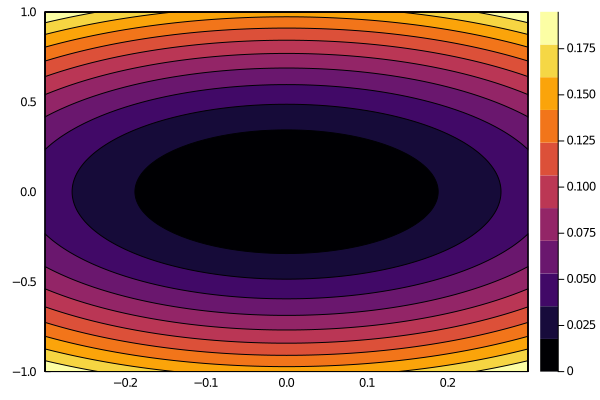

In [2]:
f(x,y, b) = 0.5*x^2 + 0.5*b*y^2 
b = 0.3
plot()
x = -b:0.01:b 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y, b), levels=10, fill = true )

#### Gradient Descent With Exact Line search

Given the a intial guess
$$t = argmin_{s \geq 0} f(x - s\nabla f(x_0))$$

$$
\begin{bmatrix} x_0 \\ y_0 \end{bmatrix} = \begin{bmatrix} b \\ 1 \end{bmatrix} \quad
\nabla f(x_0) = \begin{bmatrix} b \\ b \end{bmatrix} \quad
x - s\nabla f(x_0) = \begin{bmatrix} b(1 - s) \\ 1 - sb \end{bmatrix} \quad
$$

$$
f(x - s\nabla f(x_0)) = \frac{1}{2}(b^2(1 - s)^2 + b(1 - sb)^2)
$$

$$
\frac{f(x - s\nabla f(x_0))}{ds} = -b^2(1 - s) - b^2(1 - sb) = 0 \quad
s = \frac{2}{1 + b}
$$

$$
x_1 = b\frac{b - 1}{1 + b} \quad y_1 = \frac{1 - b}{1 + b} \quad
f_1 = \bigg(\frac{1 - b}{1 + b}\bigg)^2
$$

Apply induction

$$
x_k = b\bigg(\frac{b - 1}{1 + b}\bigg)^k \quad y_k = \bigg(\frac{1 - b}{1 + b}\bigg)^k \quad
f_k = \bigg(\frac{1 - b}{1 + b}\bigg)^{2k}
$$


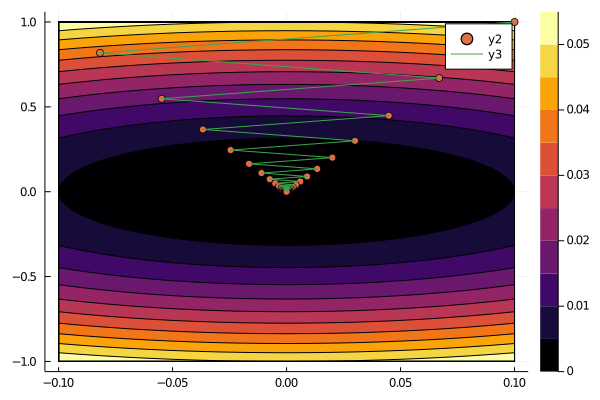

In [28]:
f(x,y) = 0.5*x^2 + 0.5*b*y^2 
∇f(x,y) = [x; b*y] 

b = 0.1
x_k = b
y_k = 1.0
ϵ = 10^(-6)

x_vals, y_vals = GD_ellispe(∇f, b, x_k, y_k, ϵ)


plot()
x = -b:0.01:b 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true )
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [29]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")

Number of iterations: 61
(x^*, y^*) = 5.901867523509506e-7,5.901867523509506e-6
p^* = 1.915762214578093e-12


In [30]:
println("Ratio: ",(1-b)/(1+b))

Ratio: 0.8181818181818181


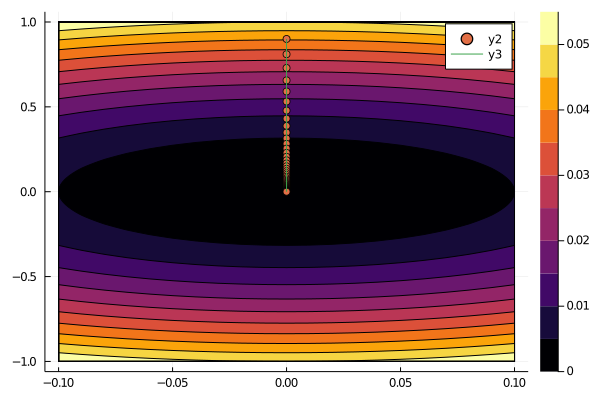

In [31]:
P =[1 0; 0 1]
α = 0.1
β = 0.4
x_k = b
y_k = 1
x_vals, y_vals = Quad_Backtracking(f, ∇f, -P, x_k, y_k, α, β, ϵ)

plot()
x = -b:0.01:b 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true)
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [32]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")

Number of iterations: 111
(x^*, y^*) = 0.0,8.335248417898083e-6
p^* = 3.4738183094036243e-12


### Convergence Analysis for Gradient Descent

Assuming $f$ is strongly convex then the Hessien is positive definte and has eigenvalues between $m \leq \lambda \leq M$ with $m > 0$

Estimating $f$ by its Taylor series:

$$
f(x_{k + 1}) \leq f(x_k) + \nabla f(x_k)^T(x_{k + 1} - x_k) + \frac{M}{2}\|x_{k + 1} - x_k \|^2
$$

recall: $x_{k + 1} = x_k - s \nabla f(x_k)$

$$
f(x_{k + 1}) \leq f(x_k) - s \|\nabla f(x_k)\|^2 + \frac{Ms^2}{2}\|\nabla f(x_k)\|^2
$$

Find the $s$ that minimizes the right hand side 

$$
\frac{d}{ds}\bigg( f(x_k) - s \|\nabla f(x_k)\|^2 + \frac{Ms^2}{2}\|\nabla f(x_k)\|^2 \bigg) = 
- \|\nabla f(x_k)\|^2 + Ms\|\nabla f(x_k)\|^2 = 0
$$

$$
s = \frac{1}{M}
$$

$$
f(x_{k + 1}) \leq f(x_k) -  \frac{1}{2M}\|\nabla f(x_k)\|^2 \quad (1)
$$

Using $m$ instead 

$$
f(x_{k + 1}) \geq f(x_k) - s \|\nabla f(x_k)\|^2 + \frac{ms^2}{2}\|\nabla f(x_k)\|^2
$$

$$
f(x_{k + 1}) \geq f(x^*) \leq f(x_k) - s \|\nabla f(x_k)\|^2 + \frac{ms^2}{2}\|\nabla f(x_k)\|^2
$$

$$
f(x^*) \leq f(x_k) -  \frac{1}{2m}\|\nabla f(x_k)\|^2 \quad (2)
$$



Multipy (1) by M and (2) by m then subtract (1) and (2):

$$
f(x_{k+1}) - f(x^*) \leq \bigg(1 - \frac{m}{M}\bigg)\bigg(f(x_k) - f(x^*)\bigg)
$$

Let $c = 1 - \frac{m}{M}$ applying this inequality recursively

$$
f(x_k) - f(x^*) \leq c^k\big(f(x_0) - f(x^*)\big)
$$

Since $c < 1$ letting $k \to \infty$ then $\|f(x_k) - f(x^*)\| \to 0$ if we want $f(x_k) - f(x^*) \leq \epsilon$

$$
c^k (f(x_0) - f(x^*)) = \epsilon
$$

$$
\frac{f(x_0) - f(x^*)}{\epsilon} = \bigg(\frac{1}{c}\bigg)^k
$$

$$
\frac{\log\big(\frac{f(x_0) - f(x^*)}{\epsilon}\big)}{\log(\big(\frac{1}{c}\big)} = k 
$$

In [ ]:
b =0.2
ϵ = 10^(-6)

M = max(1,b)
m = min(1,b)
c = 1 - m/M
n = log(f(b,1,b)/ ϵ) / log(1/c)
fx_0 = f(b,1,b)


k = collect(1:n)
ckfx_0 = [c^i * fx_0 for i in 1:n]
fk = [((1-b)/(1+b))^i for i in 1:n]



plot(k, ckfx_0, yaxis=:log, label = "Bound")
plot!(k, fk, yaxis=:log, label = "GD")

## Steepest Descent

$$
\Delta x_{nsd} = argmin\{ \nabla f(x)^Tv : \|v\| = 1 \}
$$

$$
\Delta x_{sd} = \|\nabla f(x)\|_* \Delta x_{nsd}
$$

Now it seems there are two new descent options Normalized steepest descent and steepest descent, but there are many sinc the coice of norm is what maters.

#### Steepest descent for Euclidean norm

$$
\Delta x_{nsd} = argmin\{ \nabla f(x)^Tv : \|v\|_2 \leq 1 \} = \frac{- \nabla f(x)}{\|\nabla f(x)\|_2}
$$

$$
\Delta x_{sd} = - \nabla f(x)
$$

This result follows from the Cauchy-Schwarz inequality

#### Inerpretation via change of coordinates

Using a quadratic norm where $\|z\|_P = (z^T P z)^{1/2} = \|P^{1/2}z\|_2$ where $P \in S^n_{++}$ we can preform a change of coordinates $x = P^{1/2}\bar{x}$

$$
\Delta x_{sd} = - P^{-1} \nabla f(x)
$$

In [ ]:
f(x,y) = exp(x + 3y -0.1) + exp(x - 3y - 0.1) + exp(-x - 0.1)
∇f(x,y) = [ exp(x + 3y -0.1) + exp(x - 3y - 0.1) - exp(-x - 0.1); 3*exp(x + 3y -0.1) - 3*exp(x - 3y - 0.1)]
b = 0.3
plot()
x = -3:0.01:3
y = -3:0.01:3
contour( x,y ,(x, y)->f(x, y), levels=30, fill = true, clims=(-10, 10) )

In [ ]:
P = [1 0; 0 1]
α = 0.3
β = 0.2
x_k = 2
y_k = 0.5
ϵ = 10^(-6)
x_vals, y_vals = Quad_Backtracking(f, ∇f, -P, x_k, y_k, α, β, ϵ)
plot()
x = -5:0.01:5 
y = -0.5:0.01:0.5
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true, clims=(-20, 20))
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [ ]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")

In [ ]:
∇f(x_vals[end],y_vals[end])

In [ ]:
P = [8 0.5; 0.5 2]
fP(x,y) = [x;y]'P*[x;y]
α = 0.3
β = 0.8
x_k = 2
y_k = 0.5
x_vals, y_vals = Quad_Backtracking(f, ∇f, -P, x_k, y_k, α, β, ϵ)


plot()
x = -5:0.01:5 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true, clims=(-20, 20))
contour!(x,y ,(x, y)->fP(x,y), levels=10, fill = false, clims=(-20, 20))
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [ ]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")

In [ ]:
H(x,y) =  [ 
    (exp(x + 3y -0.1) + exp(x - 3y - 0.1) + exp(-x - 0.1)) (3*exp(x + 3y -0.1) - 3*exp(x - 3y - 0.1))
    (3*exp(x + 3y -0.1) - 3*exp(x - 3y - 0.1)) (9*exp(x + 3y -0.1) + 9*exp(x - 3y - 0.1))]

In [ ]:
P = [8 0.5; 0.5 2]
fP(x,y) = [x;y]'H( -0.3465733592305906,-3.476773699130429e-8)*[x;y]
α = 0.3
β = 0.2
x_k = 1.0
y_k = 1.0
x_vals, y_vals = Quad_Backtracking(f, ∇f, -H( -0.3465733592305906,-3.476773699130429e-8), x_k, y_k, α, β, ϵ)


plot()
x = -5:0.01:5 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true, clims=(-20, 20))
contour!(x,y ,(x, y)->fP(x,y), levels=10, fill = false, clims=(-20, 20))
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [ ]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")

In [ ]:

l = 4
x_vals, y_vals = updating_Hessien_Descent(f, ∇f, H, x_k, y_k, l, α, β, ϵ)

plot()
x = -5:0.01:5 
y = -1:0.01:1
contour( x,y ,(x, y)->f(x, y), levels=10, fill = true, clims=(-20, 20))
scatter!(x_vals, y_vals)
plot!(x_vals, y_vals)

In [ ]:
println("Number of iterations: $(size(x_vals,1))")
println("(x^*, y^*) = $(x_vals[end]),$(y_vals[end])")
println("p^* = $(f(x_vals[end],y_vals[end]))")